This notebook is focused on performing **Exploratory Data Analysis** on the [House Prices: Advanced Regression techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Before starting I want to thank other kaggle users for their work on this problem. It helped me alot in understanding this problem.

This and others notebooks onn this project series relies heavily on other great kernels made on this dataset.
Naming a few:
1. [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
2. [A study on Regression applied to the Ames dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
3. [Eda and prediction of House Price](https://www.kaggle.com/siddheshpujari/eda-and-prediction-of-house-price)
3. [Stacked Regressions to predict House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
4. [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)
5. [How I made top 0.3% on a Kaggle competition](https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Personal-selection-and-understanding-of-features" data-toc-modified-id="Personal-selection-and-understanding-of-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Personal selection and understanding of features</a></span></li><li><span><a href="#Taking-a-look-at-SalePrice" data-toc-modified-id="Taking-a-look-at-SalePrice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Taking a look at SalePrice</a></span><ul class="toc-item"><li><span><a href="#Relationship-between-selected-features" data-toc-modified-id="Relationship-between-selected-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Relationship between selected features</a></span><ul class="toc-item"><li><span><a href="#Relation-with-numerical-variables" data-toc-modified-id="Relation-with-numerical-variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Relation with numerical variables</a></span></li><li><span><a href="#Relation-with-categorical-variables" data-toc-modified-id="Relation-with-categorical-variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Relation with categorical variables</a></span></li></ul></li></ul></li><li><span><a href="#Analysis-of-other-variables" data-toc-modified-id="Analysis-of-other-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis of other variables</a></span><ul class="toc-item"><li><span><a href="#Correlation-matrix-Heatmap" data-toc-modified-id="Correlation-matrix-Heatmap-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation matrix Heatmap</a></span></li></ul></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing data</a></span></li><li><span><a href="#Considering-effect-of-Outliers" data-toc-modified-id="Considering-effect-of-Outliers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Considering effect of Outliers</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Bivariate-analysis" data-toc-modified-id="Bivariate-analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bivariate analysis</a></span></li></ul></li><li><span><a href="#Target-Assumptions" data-toc-modified-id="Target-Assumptions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Target Assumptions</a></span><ul class="toc-item"><li><span><a href="#Normality" data-toc-modified-id="Normality-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Normality</a></span></li><li><span><a href="#homoscedasticity" data-toc-modified-id="homoscedasticity-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>homoscedasticity</a></span></li><li><span><a href="#Skewed-Features" data-toc-modified-id="Skewed-Features-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Skewed Features</a></span></li><li><span><a href="#Temporal-variables" data-toc-modified-id="Temporal-variables-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Temporal variables</a></span></li></ul></li><li><span><a href="#Types-of-numerical-variables" data-toc-modified-id="Types-of-numerical-variables-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Types of numerical variables</a></span><ul class="toc-item"><li><span><a href="#Discrete-numerical-values" data-toc-modified-id="Discrete-numerical-values-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Discrete numerical values</a></span></li><li><span><a href="#Continuous-numerical-values" data-toc-modified-id="Continuous-numerical-values-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Continuous numerical values</a></span><ul class="toc-item"><li><span><a href="#Performing-Logarithmic-transformation-to-the-data" data-toc-modified-id="Performing-Logarithmic-transformation-to-the-data-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Performing Logarithmic transformation to the data</a></span></li></ul></li></ul></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# # set dataset path

# train_data = os.path.join("/kaggle/input/house-prices-advanced-regression-techniques", "train.csv")
# test_data = os.path.join("/kaggle/input/house-prices-advanced-regression-techniques", "test.csv")

In [3]:
# read datasets

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# size of dataset
# as 81 features so we can try different feature selection and feature engineering methods

train.shape

(1460, 81)

In [5]:
# display info about the dataset

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# sneak peek

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

# Personal selection and understanding of features

As suggested in the notebook before starting it would be a good idea to to explore the data description file given as it would help to better understand the available features. It will also be helpful because we can see that there are **81** features present and some of them won't provide useful information in terms of the dependant feature i.e. `SalePrice`.

After going through the proces, we can clearly that the features as selected by [Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) are completely valid with the addition of one more i.e. `TotRmsAbvGrd` could also be an important factor for prediction of SalePrice.
As pointed out in the kernel, `Neigborhood` feature didn't appeal as much information than the selected ones.
Features to inspect:
* OverallQual
* YearBuilt.
* TotalBsmtSF.
* GrLivArea
* TotRmsAbvGrd

# Taking a look at SalePrice

In [7]:
# let's take look at stats for SalePrice

train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Without even plotting the histogram or KDE we can clearly see that the feature is skewed as the `mean` and meadian i.e.`25%` values are different, also we can see that `75%` of the prices values are between **35000 - 215000** but the max value is way of the scale than it should be. Let's plot this to see if our conclusion is True.

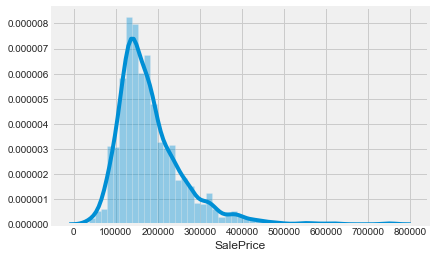

In [8]:
_ = sns.distplot(train.SalePrice)

And...we were right. The data is right skewed(tail is on the right hand side).
Let's look at how skewed the data is.

In [9]:
#skewness and kurtosis

print(f"Skewness: {train['SalePrice'].skew()}")
print(f"Kurtosis: {train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Woah, it's more badly skewed than I hoped it would be, to negate this effect we would have to apply some kind of transformation to the feature viz. `log` or `BoxCox` during the feature engineering process.

## Relationship between selected features

### Relation with numerical variables

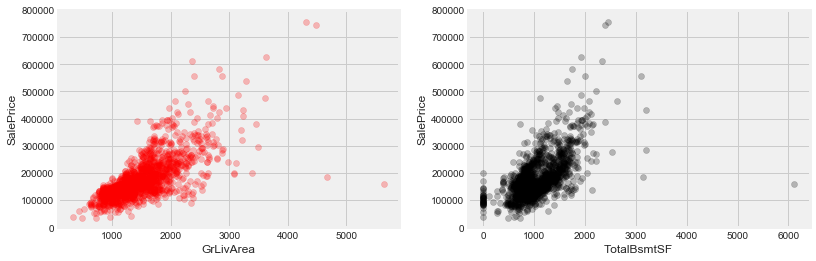

In [10]:
#scatter plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(train['GrLivArea'], train['SalePrice'], c='red', alpha=0.25)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.ylim(0,800000)

plt.subplot(1, 2, 2)
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], c='k', alpha=0.25)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.ylim(0,800000)
plt.show()

We can see that there is a linear relationship between `SalePrice` and `GrLivArea` whereas there's a slight exponential relationship with `TotalBsmtSF`

### Relation with categorical variables

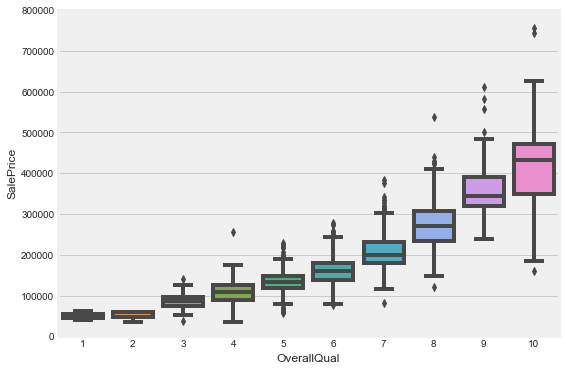

In [11]:
plt.figure(figsize=(8, 6))
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
_ = sns.boxplot(x=var, y="SalePrice", data=data)
plt.axis(ymin=0, ymax=800000)
plt.show()

The plot just confirms the fact the higher quality, higher the price.

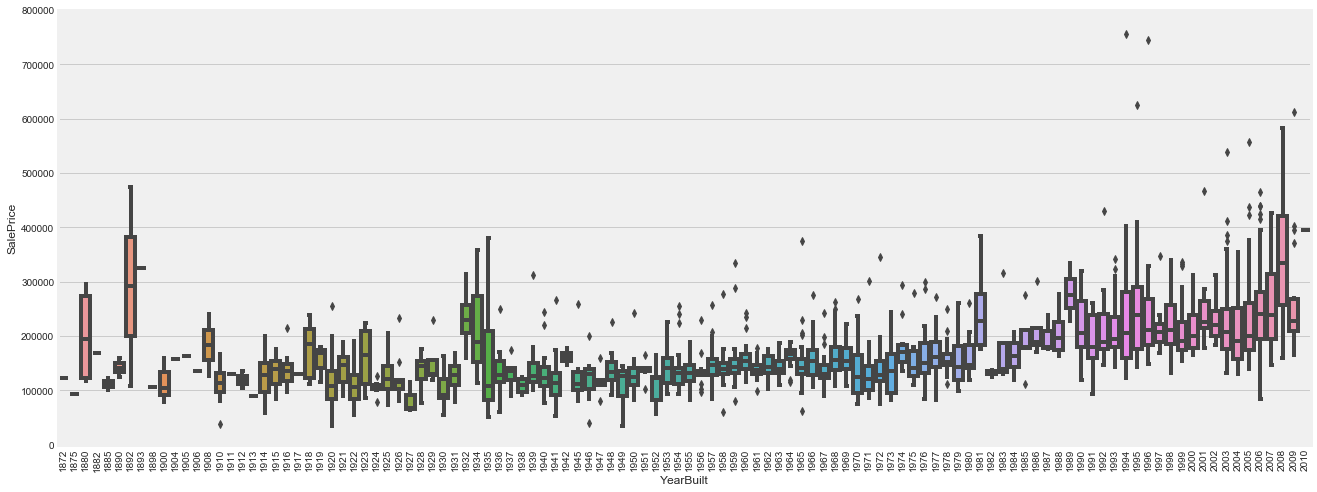

In [12]:
plt.figure(figsize=(20, 8))
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
_ = plt.xticks(rotation=90)

Though we can never quantify this for sure, but more recently built houses will have a high price.

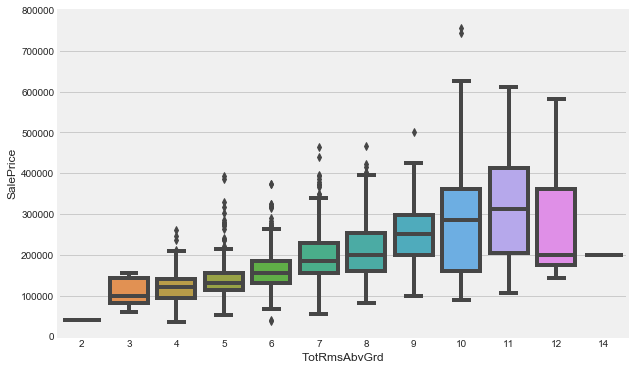

In [13]:
plt.figure(figsize=(20, 6))
var = 'TotRmsAbvGrd'
plt.subplot(1, 2, 1)
data = pd.concat([train['SalePrice'], train[var]], axis=1)
_ = sns.boxplot(x=var, y="SalePrice", data=data)
plt.axis(ymin=0, ymax=800000)
plt.show()

It's natural the more room the house has the higher the price.

**Summary:**
* `GrLivArea` and `TotalBsmtSF` seem to be linearly related with 'SalePrice'. Both relationships are positive.
* `OverallQual`, `TotRmsAbvGrd` and `YearBuilt` also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of `OverallQual`, where the box plot shows how sales prices increase with the overall quality. The same conclusion can be reached with `TotRmsAbvGrd`, though it's not as stronger as `OverallQual`.


# Analysis of other variables

So far we only took the variables that we subjectively chose and made performed analysis about them, but it's the best approach, we need to look at the available data subjectively.

## Correlation matrix Heatmap



all numerical features

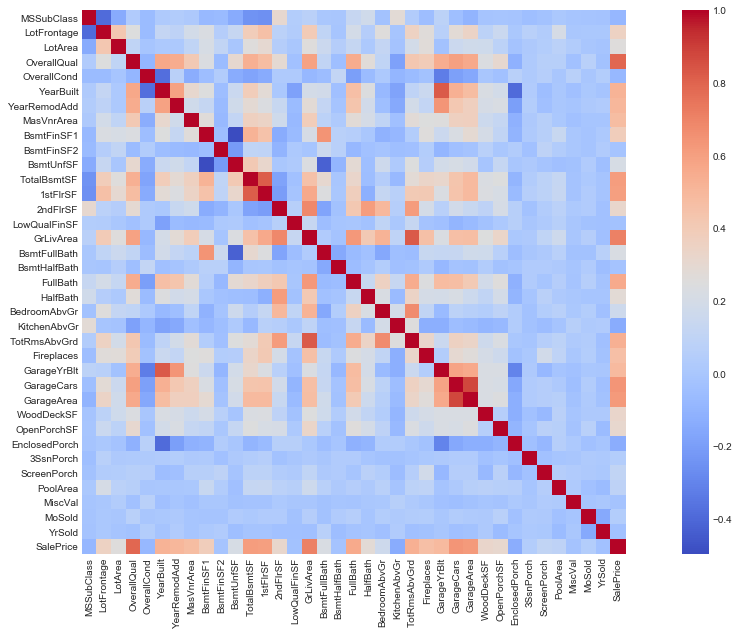

In [14]:
plt.figure(figsize=(18, 10))
corrmat = train.drop('Id', 1).corr()
_ = sns.heatmap(corrmat, vmax=1.0, square=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'size': 8})
plt.show()

**From the kernel:**


At first sight, there are two red colored squares that get my attention. The first one refers to the `TotalBsmtSF` and `1stFlrSF` variables, and the second one refers to the `GarageX` variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known `GrLivArea`, `TotalBsmtSF`, and `OverallQual` saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

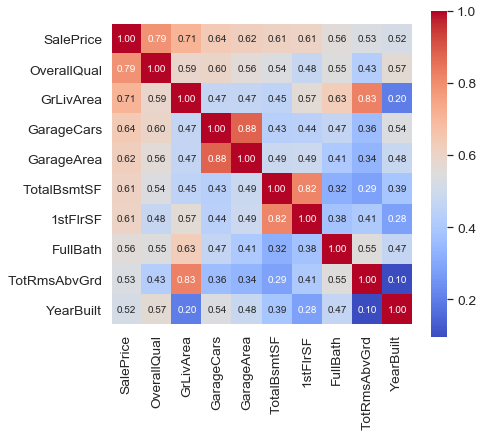

In [15]:
plt.figure(figsize=(6, 6))

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap='coolwarm',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* `OverallQual`, `GrLivArea` and `TotalBsmtSF` are strongly correlated with `SalePrice`.
* `TotRmsAbvGrd` and `GrLivArea` are strongly correlated each other. We can drop `TotRmsAbvGrd` as it's not as correlated with `SalePrice` than `GrLivArea`.
* `GarageCars` and `GarageArea` are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. `GarageCars` and `GarageArea` are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* `TotalBsmtSF` and `1stFloor` also seem to be twin brothers. We can keep `TotalBsmtSF` just to say that our first guess was right.
* `FullBath` seems odd but expected
* `TotRmsAbvGrd` and `GrLivArea` are also highly correlated with each other. 
* `YearBuilt`: It seems that `YearBuilt` is slightly correlated with `SalePrice`. Honestly, it scares me to think about `YearBuilt` because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's find the continuous numerical variables in out dataset and plot a correlation matrix Heatmap

In [16]:
numerical_features = train.select_dtypes('number').columns.to_list()
numerical_features.pop(0)
print(f"Number of numerical features: {len(numerical_features)}")

# although numerical there are features which reprsent years
# there are some dicrete numerical features too.
# we need to remove them from the list.


year_features = [feature for feature in numerical_features 
                 if 'Yr' in feature or 'Year' in feature]
print(f"Number of Temporal features: {len(year_features)}")


discrete_features = [feature for feature in numerical_features 
                     if train[feature].nunique()<= 15 and feature not in year_features]
print(f"Number of discrete numerical features: {len(discrete_features)}")

continuous_num_features = [feature for feature in numerical_features 
                     if feature not in discrete_features + year_features] 
                                               
print(f"Number of continuous numerical features: {len(continuous_num_features)}")

Number of numerical features: 37
Number of Temporal features: 4
Number of discrete numerical features: 14
Number of continuous numerical features: 19


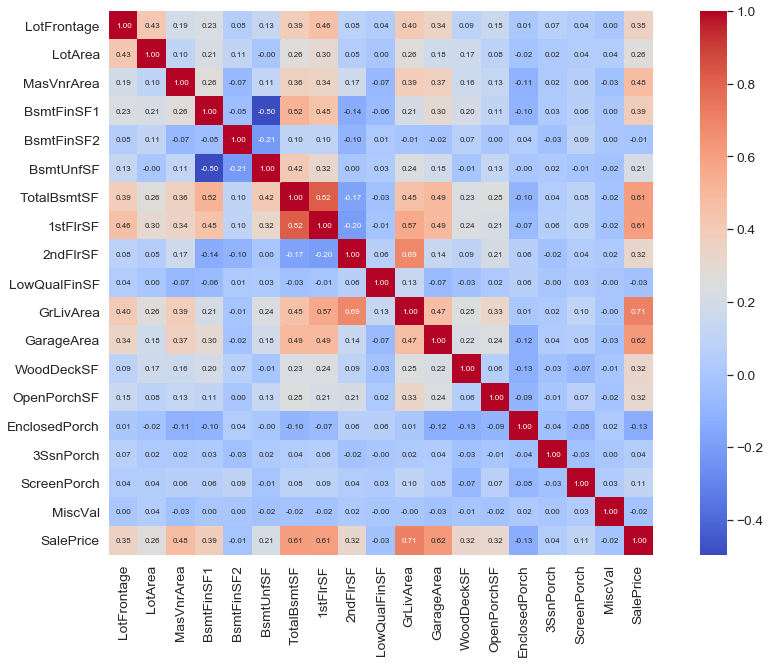

In [17]:
plt.figure(figsize=(15, 10))
corrmat = train[continuous_num_features].corr()
sns.heatmap(corrmat, vmax=1.0, square=True, fmt='.2f', 
            annot=True, cmap='coolwarm', annot_kws={'size': 8});

Some of the continuous numerical features seem to be correlated with each other though not as strongly. Though some new correlation are noticeable we still reach the same conclusions as above

In [18]:
# SalePrice scatter plot with highly correlated features

<Figure size 720x576 with 0 Axes>

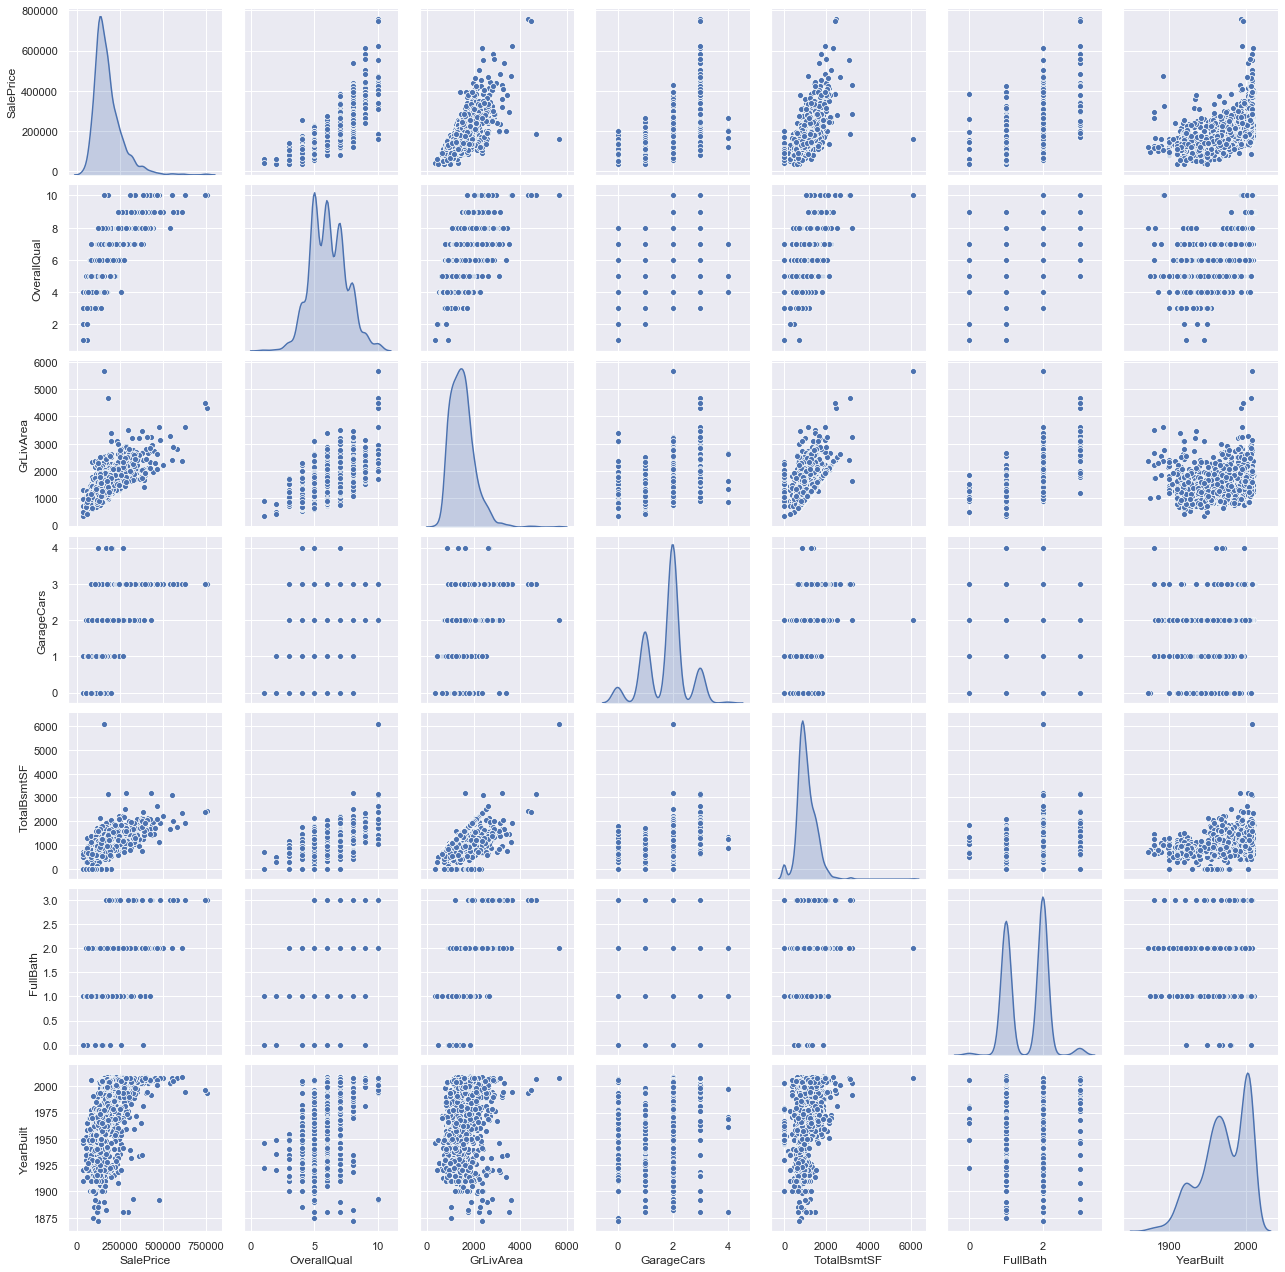

In [19]:
plt.figure(figsize=(10, 8))

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
_ = sns.pairplot(train[cols], size = 2.5, diag_kind='kde')
plt.show()

# Missing data

In [20]:
features_with_na = [features for features in train.columns if train[features].isnull().sum() >= 1]

a = pd.DataFrame({
    'features': features_with_na,
    'Total': [train[i].isnull().sum() for i in features_with_na],
    'Missing_PCT': [np.round(train[i].isnull().sum()/ train.shape[0], 4) for i in features_with_na]
}).sort_values(by='Missing_PCT', ascending=False).reset_index(drop=True)
a.style.background_gradient(cmap='Reds') 


,features,Total,Missing_PCT
0,PoolQC,1453,0.995200
1,MiscFeature,1406,0.963000
2,Alley,1369,0.937700
3,Fence,1179,0.807500
4,FireplaceQu,690,0.472600
5,LotFrontage,259,0.177400
6,GarageType,81,0.055500
7,GarageYrBlt,81,0.055500
8,GarageFinish,81,0.055500
9,GarageQual,81,0.055500


* We can either delete the features with more than 50$ missing values or can fill them with appropriate values. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house
* The `GarageX` variables have the same number of missing data.Since the most important information regarding garages is expressed by `GarageCars` and considering that we are just talking about 5% of missing data, the same logic can be applied to the `BSMTX` variables.
* For `MasVnrArea` and `MasVnrType`, these variables can be considered as not essential. Furthermore, they have a strong correlation with `YearBuilt` and `OverallQual` which are already considered. 
* `Electrical` has just one missing value we can either delete that row or fill it with mode value.

##Examining Missing Features

1. `FirePlaceQu`: 690 missing values

In [21]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

We only have half of Fireplace quality data. 

Let's have a look at the Fireplaces feature.

In [22]:
train[train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


* Looks like `FireplaceQu` is missing at places where `FirePlaces` feature is missing.
* We can't do anything but fill these values with "Not avaliable".

2. `MasVnrType`: 8 missing values


In [23]:
#Unique elements
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [24]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [25]:
# Let's look at the repeated value in MasVnrType column

train['MasVnrType'].mode()

0    None
dtype: object

If we look at the types of masonry venner and their corresponding area,
for all the missing values.

Area is zero.

So we can fill these missing values with "None"

3. `Bsmt` variable

* `BsmtQual`: 37 missing values
* `BsmtCond`: 37 missing values 
* `BsmtExposure`: 38 missing values
* `BsmtFinType1`: 37 missing values
* `BsmtFinType1`: 38 missing values



In [26]:
train[train['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].head(15)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [27]:
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


* The missing values would most probably  be because there is no basement.
* We can fill the missing values with _No Basement_


4. Electrical: 1 missing value

We can either just delete that row or fill the missing row with the mode of the feature

5. Garage
* `GarageType`: 81 missing values
* `GarageFinish`: 81 missing values
* `GarageQual`: 81 missing values
* `GarageCond`: 81 missing values


In [28]:
train[train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [29]:
train[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


* The GarageX variables have the same number of missing data.
* We can simply fill the variables with _No garage_.
* But mostly these values are correlateed and `GarageCars` variable can only be used.

Check if the columns with missing values has some valuable relationship with the outputs.

# Considering effect of Outliers

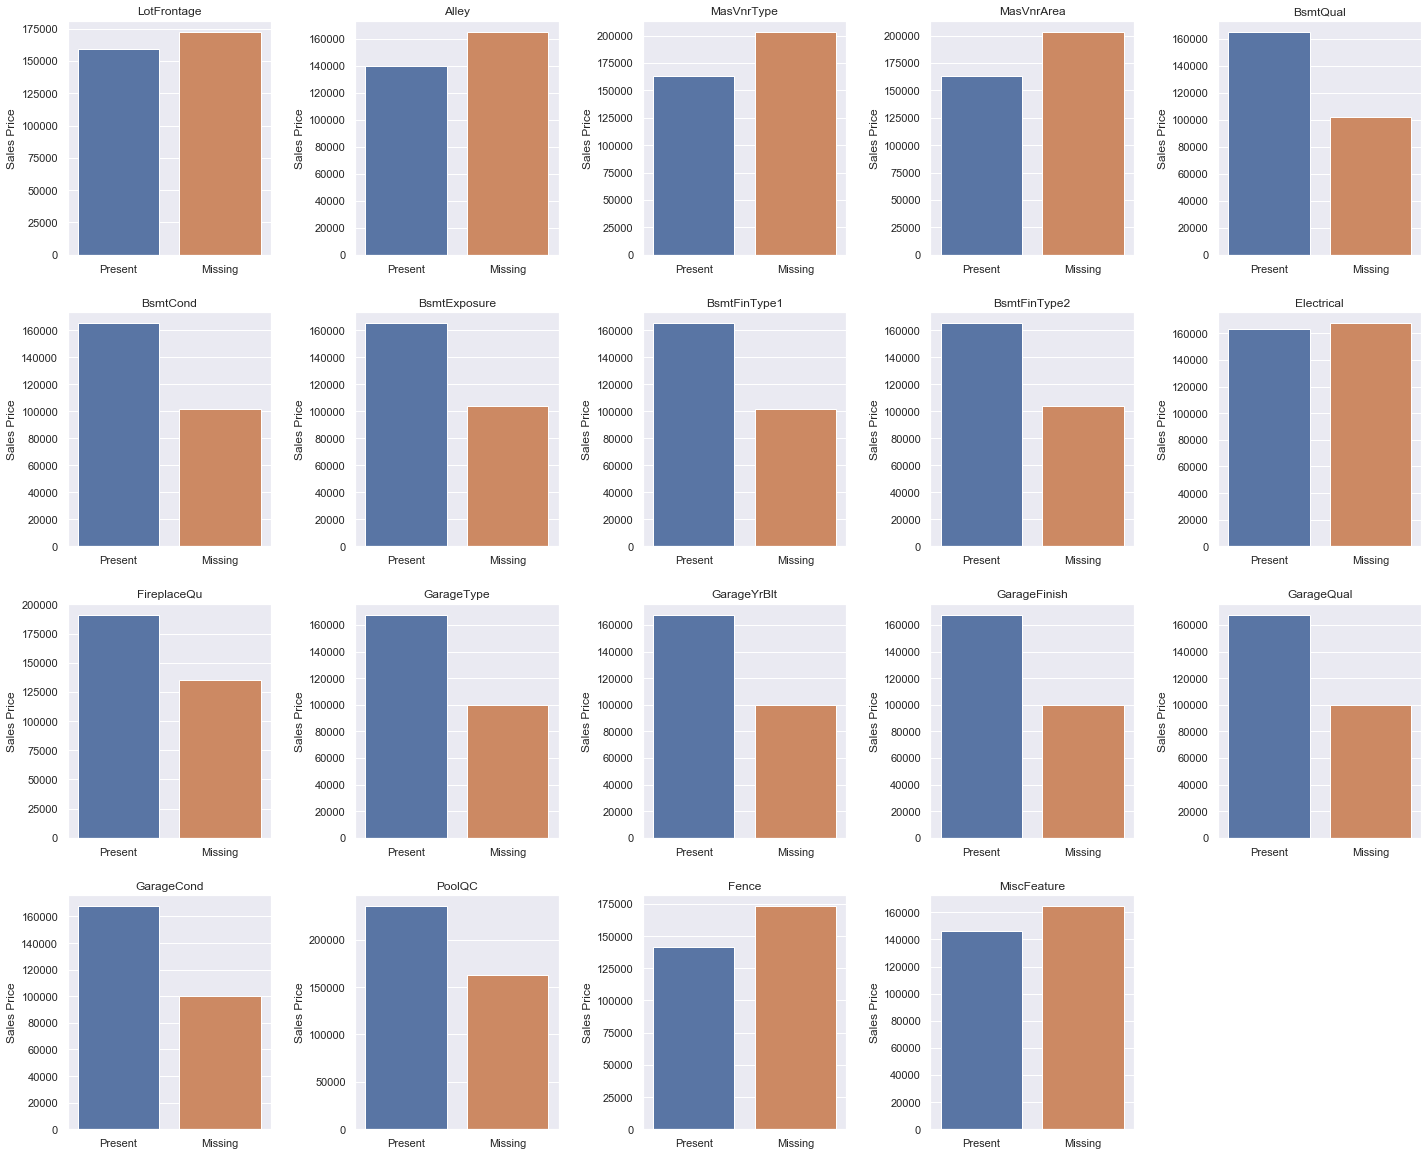

In [30]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_with_na, 1):
    plt.subplot(5, 5, i)
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['SalePrice'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.xticks([0, 1], ["Present", "Missing"])
    plt.ylabel("Sales Price", rotation=90)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

**Observation**
* We can see that for some features when the value is *NA*, the median value for that set of columns is higher than when values are available.
* So it is safe to assume that the missing values need to be replaced with some meaningful values.

## Univariate analysis

For labelling a point as an *outlier* we need to define a threshold value that defines the datapoint as an outlier. We can do this bu standardizing the data.

In [31]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

Let's examine the outliers present in continuous features after applying a log transformation 

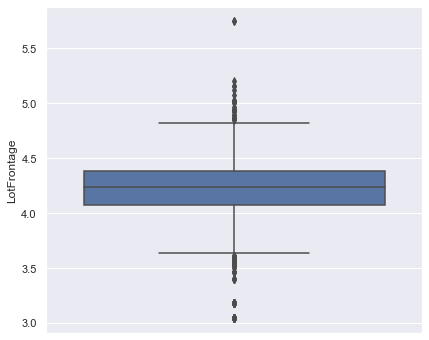

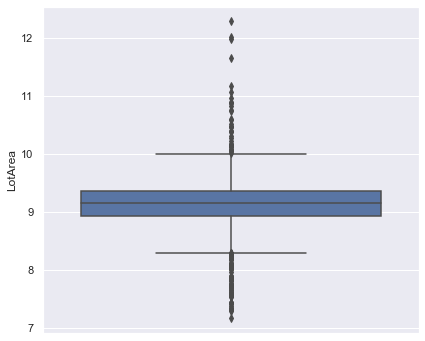

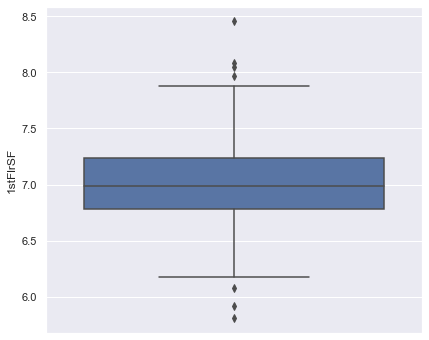

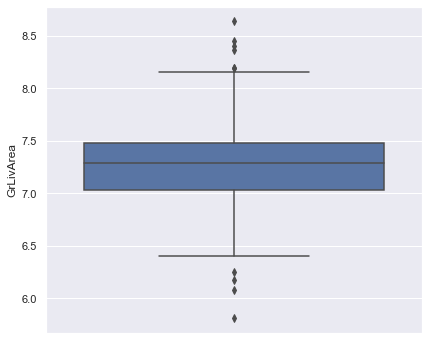

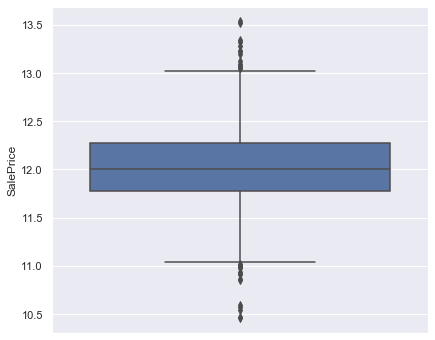

In [32]:
data = train.copy()
# sale_price = np.log(train['SalePrice'])

for i, feature in enumerate(continuous_num_features, 1):
    data = train[feature].copy()
    if 0 in data.unique(): # as log 0 is undefinedz
        continue
    else:
        data = np.log(data)   
        data.name = feature
        _ = plt.figure(figsize=(6, 6))
        _ = sns.boxplot(y=data)
    
plt.show()

**Observations**:
* There are plenty of outliers present even after log transformation in every featufres.
* These outliers will most likely interfere during the model building process.
* We will need to handle them during feature engineering
* There are a few techniques for outlier handling:
1. Outlier removal
2. Treating outliers as missing values
3. Top / bottom / zero coding
4. Discretisation


## Bivariate analysis

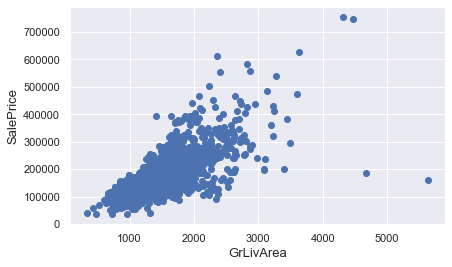

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

# Target Assumptions

**Question:** Who is `SalePrice`?


The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about `SalePrice`. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.


According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* **Histogram** - Kurtosis and skewness.
* **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

In [34]:
train.select_dtypes('number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


 mu = 180921.20 and sigma = 79415.29



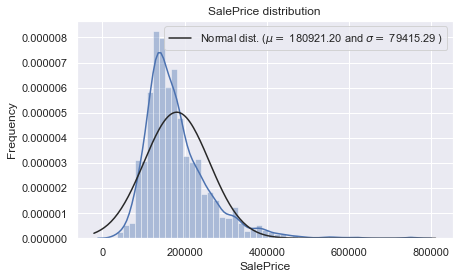

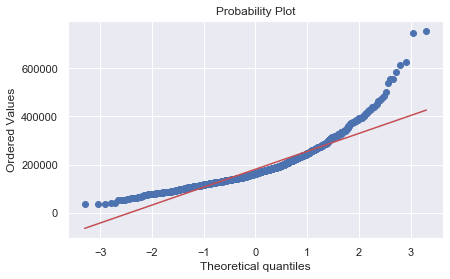

In [35]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

`SalePrice` is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

A simple data transformation can solve the problem. Similarly with `GrLivArea`

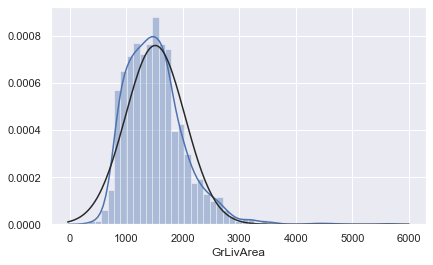

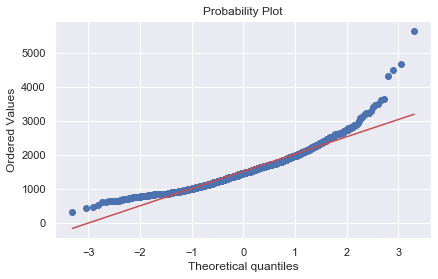

In [36]:
# GrLivArea
# histogram and normal probability plot

sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

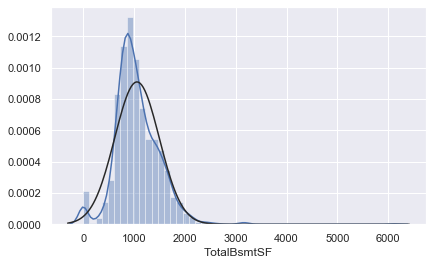

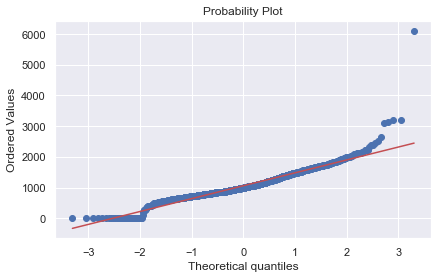

In [37]:
# TotalBsmtSF
# histogram and normal probability plot

sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

**Observations:**
* We can see the skewness present.
* We can also see that many of the values are zero.
* We cannot simply apply the log transformation on this.
* What we can do is can do is create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

Eg.
```python
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

# transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
```

## homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

## Skewed Features

In [38]:
print("\nSkew in numerical features: \n")
pd.DataFrame({
    'Feature': numerical_features,
    'Skewness': skew(train[numerical_features])}).sort_values(by='Skewness',
                                                              ascending=False).set_index('Feature').head(10)


Skew in numerical features: 



,Skewness
Feature,
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


* We can see a lot of numerical features are heavily skewed.
* We would need to apply a **log** or **box cox** transformations to these features.

**[NOTE]**: We'll look at feature transformation during feature engineering process.

## Temporal variables

* There are total of 4 datetime variables/columns in the dataset.
* These columns are useful for prediction as we can assume that there will be changes in price values depending upon time.

In [39]:
train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


`SalePrice` w.r.t. `YrSold` 

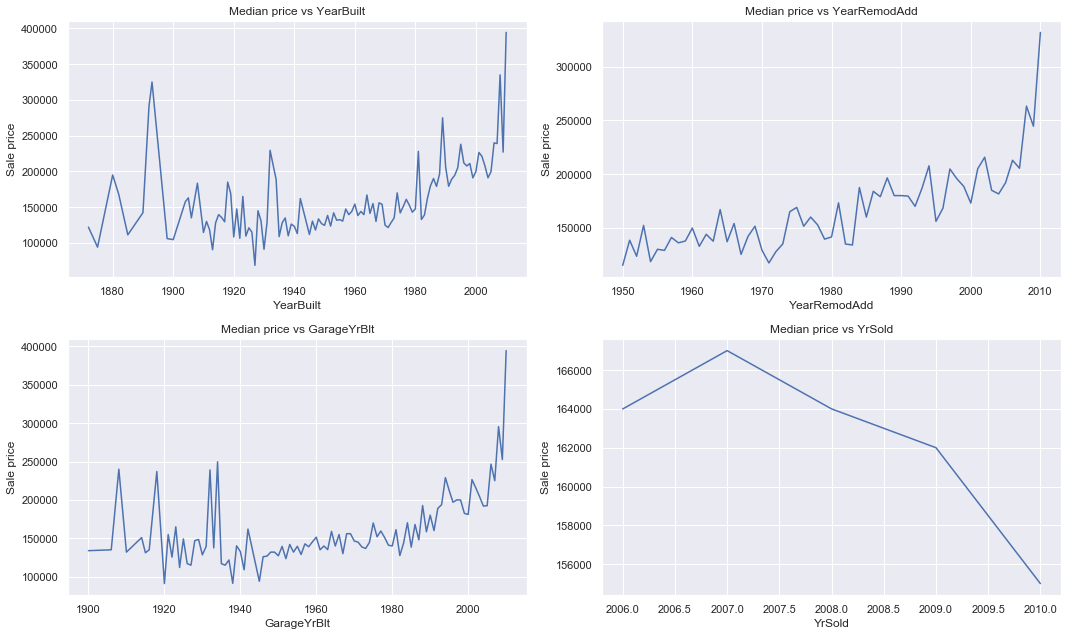

In [40]:
plt.figure(figsize=(15, 9))
for i, feature in enumerate(year_features, 1):
    plt.subplot(2, 2, i)
    temp = train.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    # plt.xlim([2006, 2010])
    # plt.xticks(range(2006, 2011))
    plt.title(f"Median price vs {feature}")
    plt.ylabel("Sale price", rotation=90)
plt.tight_layout(w_pad=1.2, h_pad=1.2)
plt.show()

**Observations**
* We can see an unusual trend between Sales price and Year Sold, typically the prices of house increases with time but from the graph we can see the opposite.
* One reason could due to the financial drought of '08 when in the US collapsed.
* We can see that the houses and garage which were built and remoddeled during 90s have less Sale Price than the newer ones.
* With every year new houses that are built, the house price increases.

Calculate the difference between all `year_features` with `SalePrice`. Doing this will allow us to get the `age` of the houses and with the help of scatter plot can see the relationship between `SalePrice` with the `age` of the house

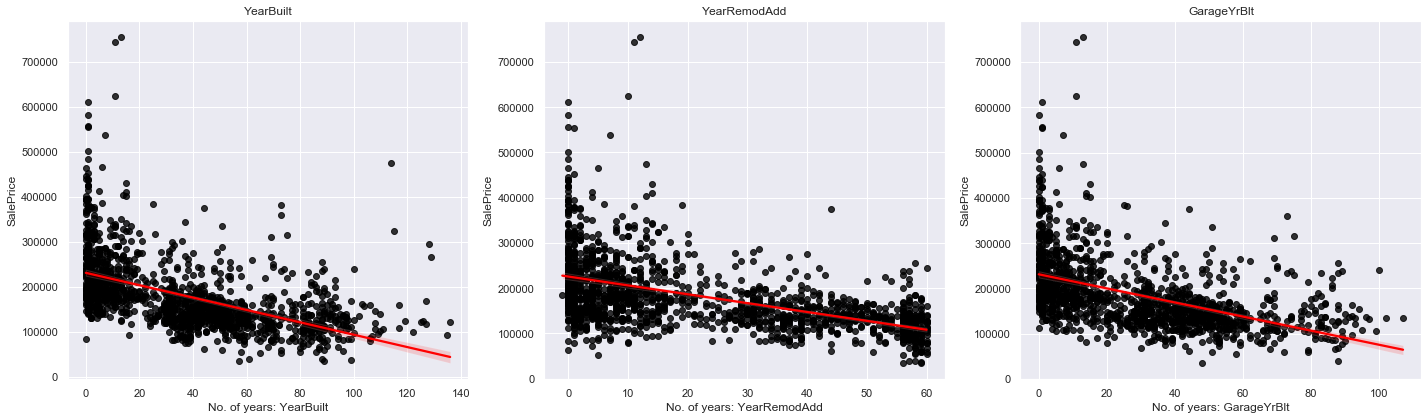

In [41]:
plt.figure(figsize=(20, 6))

for i, feature in enumerate(year_features, 1):
    
    if feature != 'YrSold':
        data = train.copy()
        
        data[feature] = data['YrSold'] - data[feature]
        plt.subplot(1, 3, i)
#         plt.scatter()
        plt.title(feature)
        
        plt.ylabel('SalePrice')
        sns.regplot(data[feature], data['SalePrice'], 
                   scatter_kws={"color": "black"}, line_kws={"color": "red"})
        plt.xlabel(f"No. of years: {feature}")
plt.tight_layout()
plt.show()        

**Observation:**
* What we did was take a look at the `SalePrice` values through the years for different features.
* We can see that although there were different intervals, the regression line passing is almost the same.
* We can see that new houses built or remodelled or had a newly built garage were sold for higher prices.

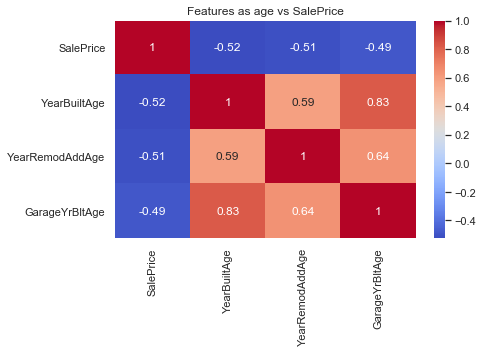

In [42]:
sns.heatmap(pd.DataFrame({
    'SalePrice': train['SalePrice'],
    'YearBuiltAge': train['YrSold'] - train['YearBuilt'],
    'YearRemodAddAge': train['YrSold'] - train['YearRemodAdd'],
    'GarageYrBltAge': train['YrSold'] - train['GarageYrBlt'],
}).corr(), annot=True, cmap='coolwarm')
plt.title('Features as age vs SalePrice')
plt.show()

**Observations**
* We can clearly see that time interval of `YrBuilt` and `GarageYrBuild` are highly correlated with each other, so is `YrRemodAdd` with `GarageYrBuild`.
* Interval of `YrBuilt` is not correlated with  `SalePrice`.
* During feature engineering we can convert these temporal features to represent the interval.
* We can also see that time intervals of `YrBuilt` and `YrRemodAdd` are highly negatively correlated with `SalePrice`. 
* If we need to keep one of them, from a subjective point of view I'll choose to keep the `YrRemodAdd` as from my perspective, the year the house was built though important we will most likely ask for the date the house was remodelled as a way to get info has an effect on the price of the house. We can use different models that indicate feature importance to check this out.

# Types of numerical variables
1. Continuous
2. Discrete

## Discrete numerical values

In [43]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [44]:
train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


relationship between discrete features and SalePrice

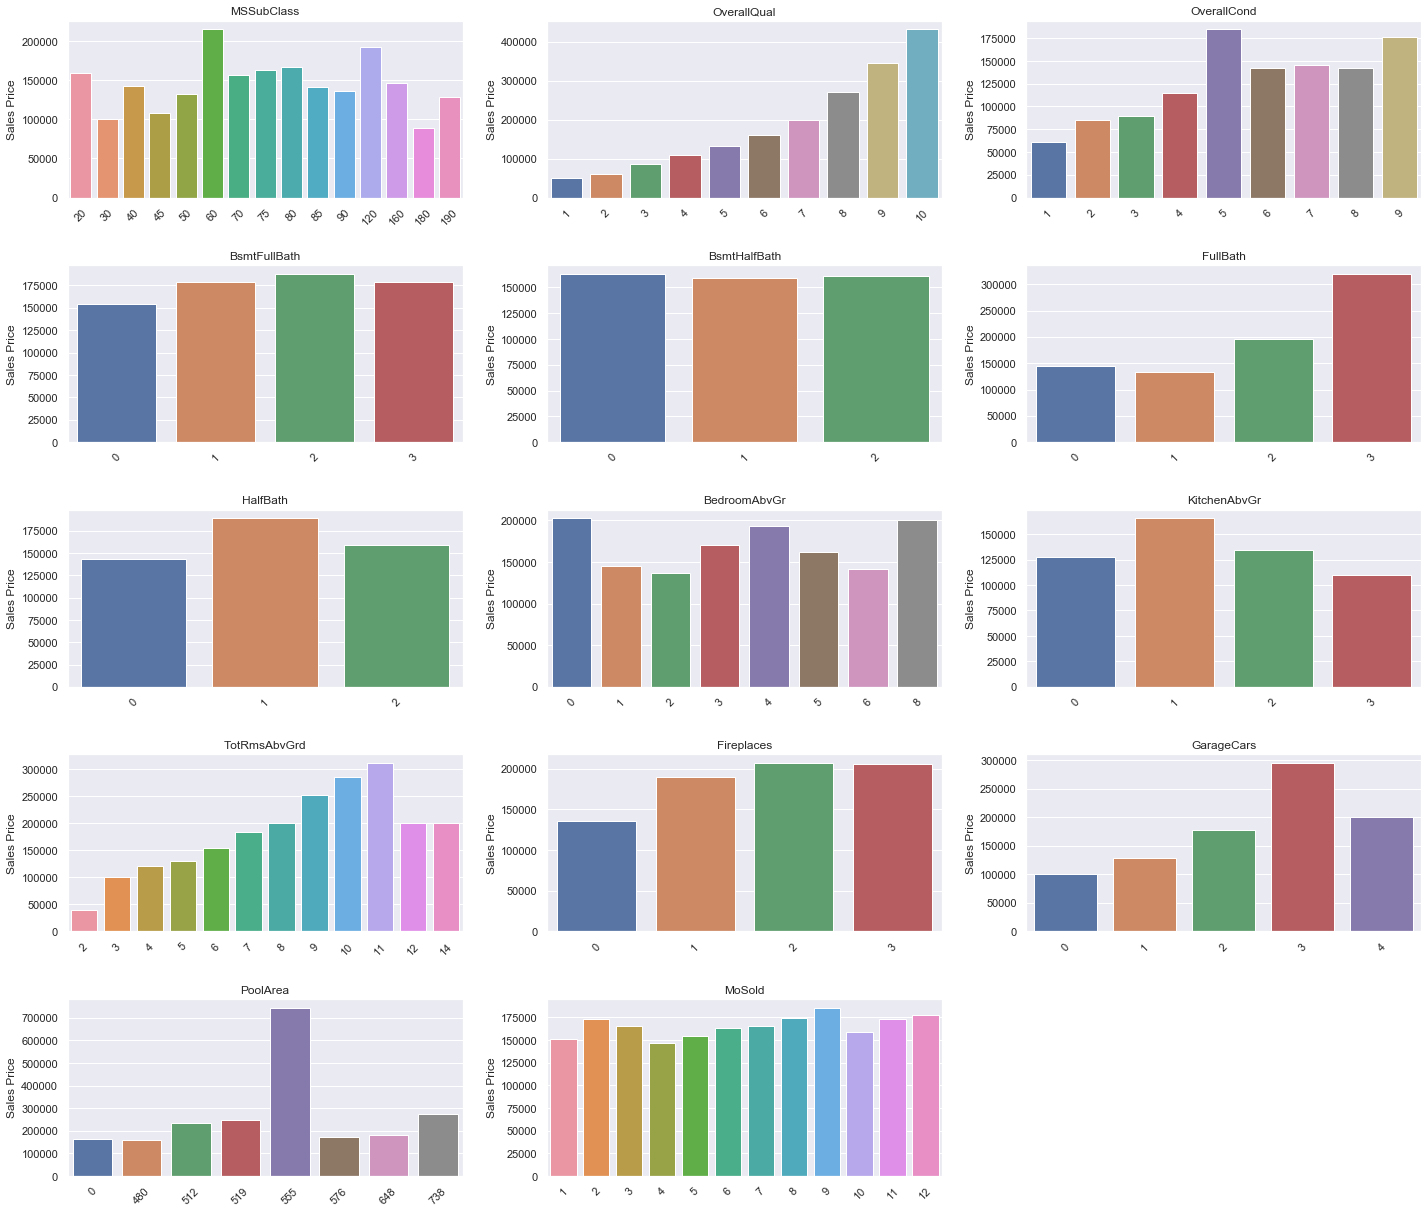

In [45]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(discrete_features, 1):
    plt.subplot(6, 3, i)
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['SalePrice'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("Sales Price", rotation=90)
    plt.xticks(rotation=45)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

**Observations**:
* It's clear that the values of discrete numerical features has an effect on the SalePrice.
* At some places we can see that as the feature value increases the price also increases
* At some places the bars has pretty high for only some values.
* We can see some features that have almost the same SalePrice for it's different values
* Looking from the top, it's not clear how most of the features will have an impact on the SalePrice.
* Feature selection process might be able to clear this up.

## Continuous numerical values

In [46]:
print(f"Number of Continuous numerical feature: {len(continuous_num_features)}")

Number of Continuous numerical feature: 19


In [47]:
continuous_num_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [48]:
train[continuous_num_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


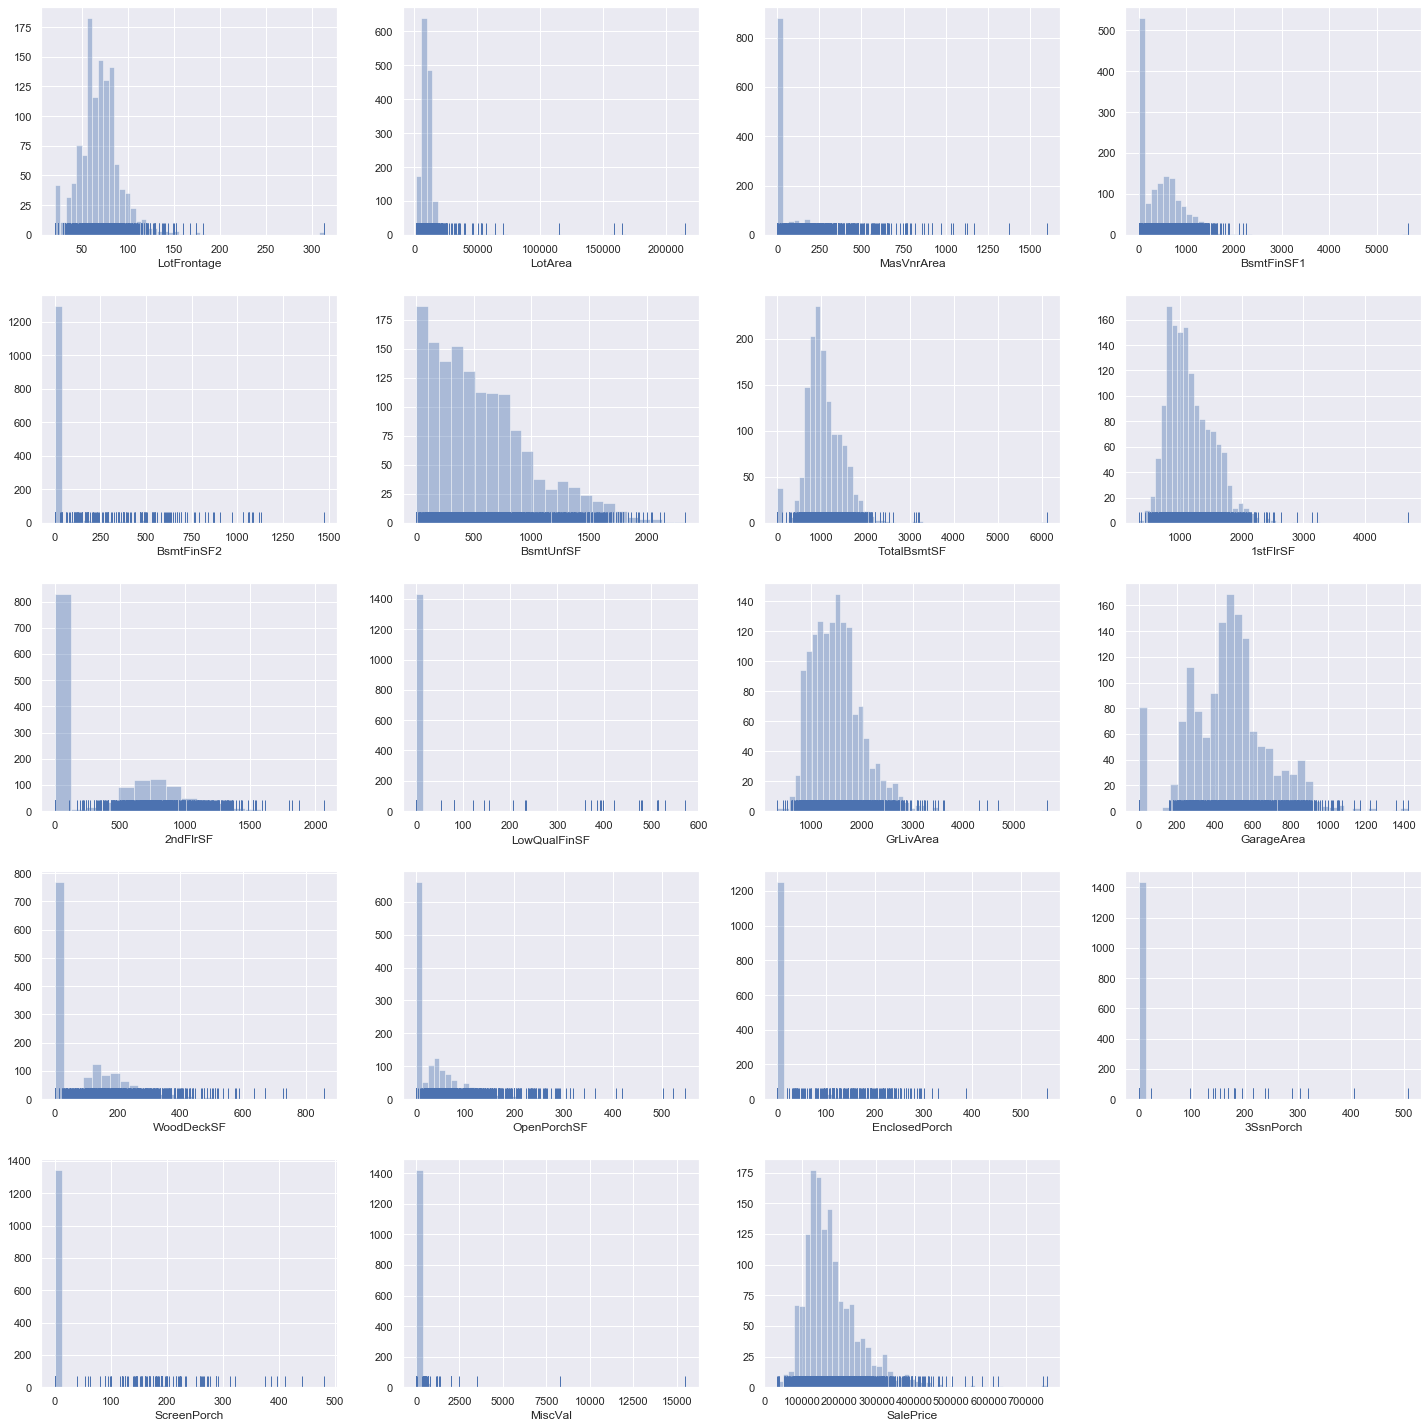

In [49]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(continuous_num_features, 1):
    plt.subplot(5, 4, i)
#     _ = sns.distplot(train[feature], kde_kws={'bw': 1.05})    
    _ = sns.distplot(train[feature], kde=False, rug=True)
    
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

**Observations:**
* For starters we can see that the most of the continuous features don't follow a normal distribution.
* Some of the features are heavily skewed so we would have to perform some transformation to them.

### Performing Logarithmic transformation to the data

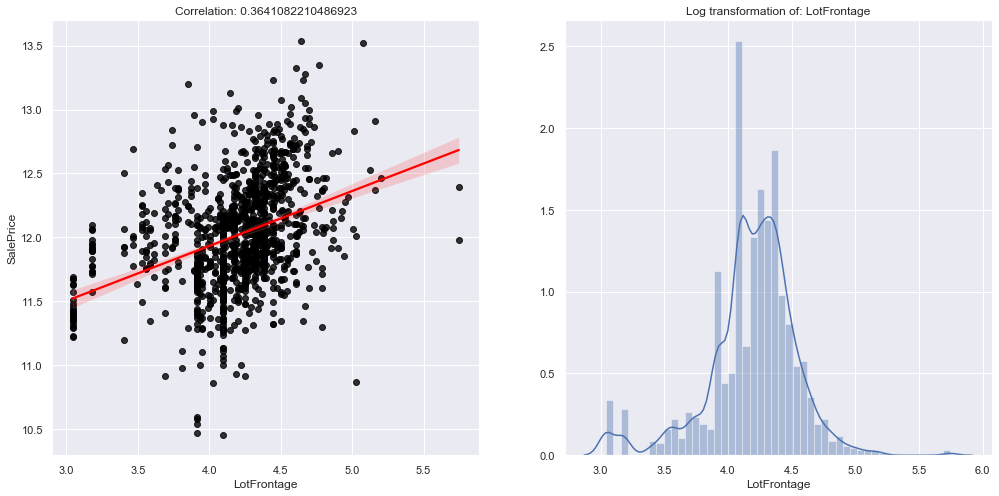

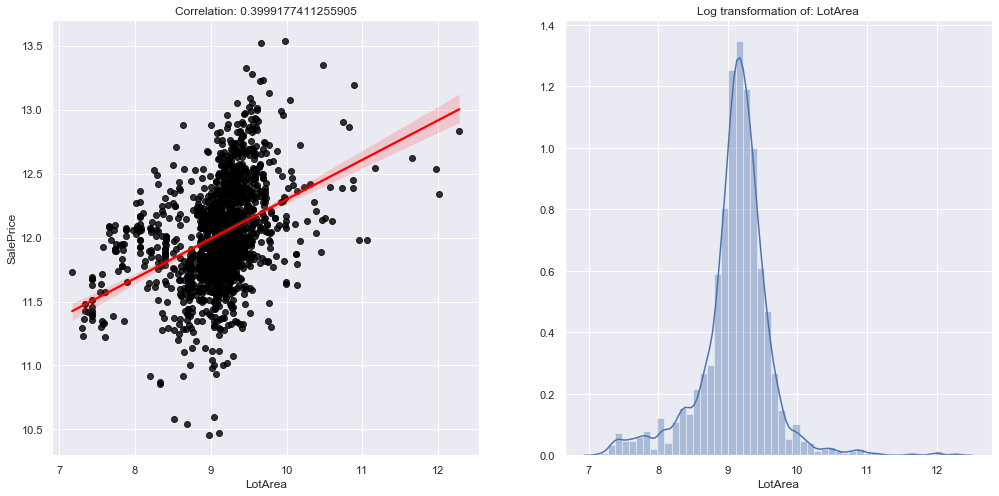

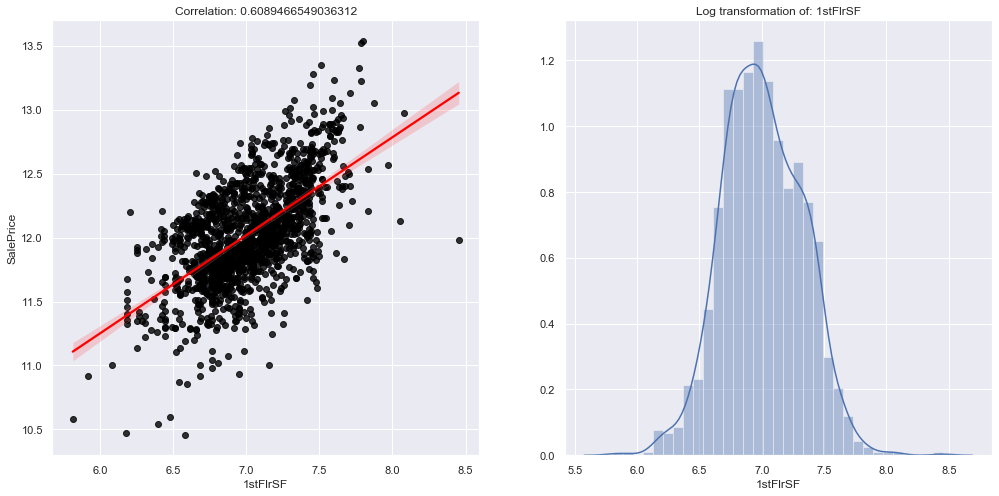

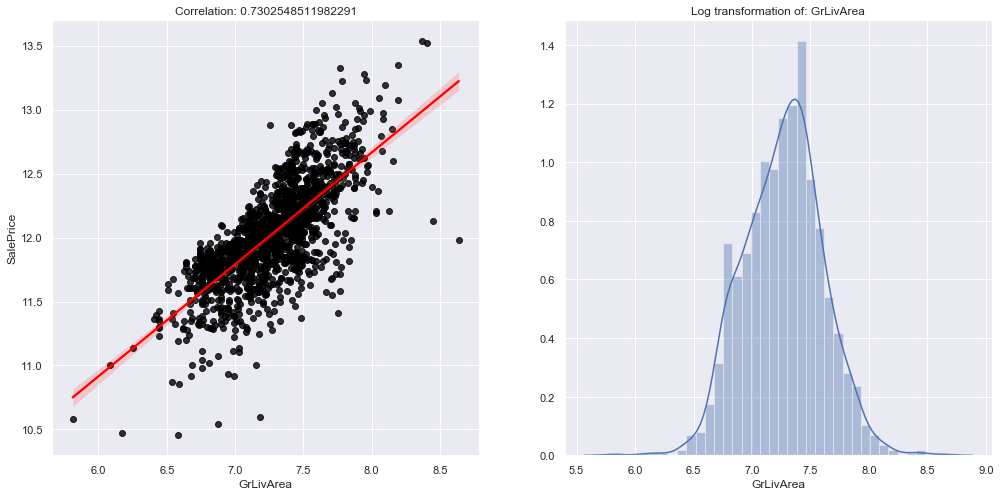

In [50]:
data = train.copy()

sale_price = np.log(train['SalePrice'])

for i, feature in enumerate(continuous_num_features[:-1], 1):
    data = train[feature].copy()
    
    if 0 in data.unique(): # as log 0 is undefinedz
        continue
    else:
        data = np.log(data)    
        data.name = feature
        _ = plt.figure(figsize=(15, 8))
        plt.subplot(1, 2, 1)
        sns.regplot(data, sale_price, fit_reg=True,
                   scatter_kws={"color": "black"}, line_kws={"color": "red"}).set_title(f"Correlation: {data.corr(sale_price)}")
        plt.subplot(1, 2, 2)
        sns.distplot(data).set_title(f"Log transformation of: {feature}")
plt.show()

**Observations:**
* Though the data has been transformed we can see some irregulaties for eg. `LotArea` looking at the scatter we can see that for some _same_ values the SalePrice increases. We can see that there's not much of correlation between the two
* log(`GrLivArea`) is heavily correlated with `SalePrice` and so is `1stFlrSF`
* We were not able to take log of other continuous features as `log(0)` is undefined

# Categorical variables

In [51]:
categorical_features = [feature for feature in train.columns if train[feature].dtypes=='O']
print(f"Number of categorical feature: {len(categorical_features)}")

Number of categorical feature: 43


In [52]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [53]:
train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [54]:
pd.DataFrame({
    "features": categorical_features,
    "Nunique": [train[feature].nunique() for feature in categorical_features]             
             })

,features,Nunique
0,MSZoning,5
1,Street,2
2,Alley,2
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9


Find out the relationship between categorical features and SalePrice

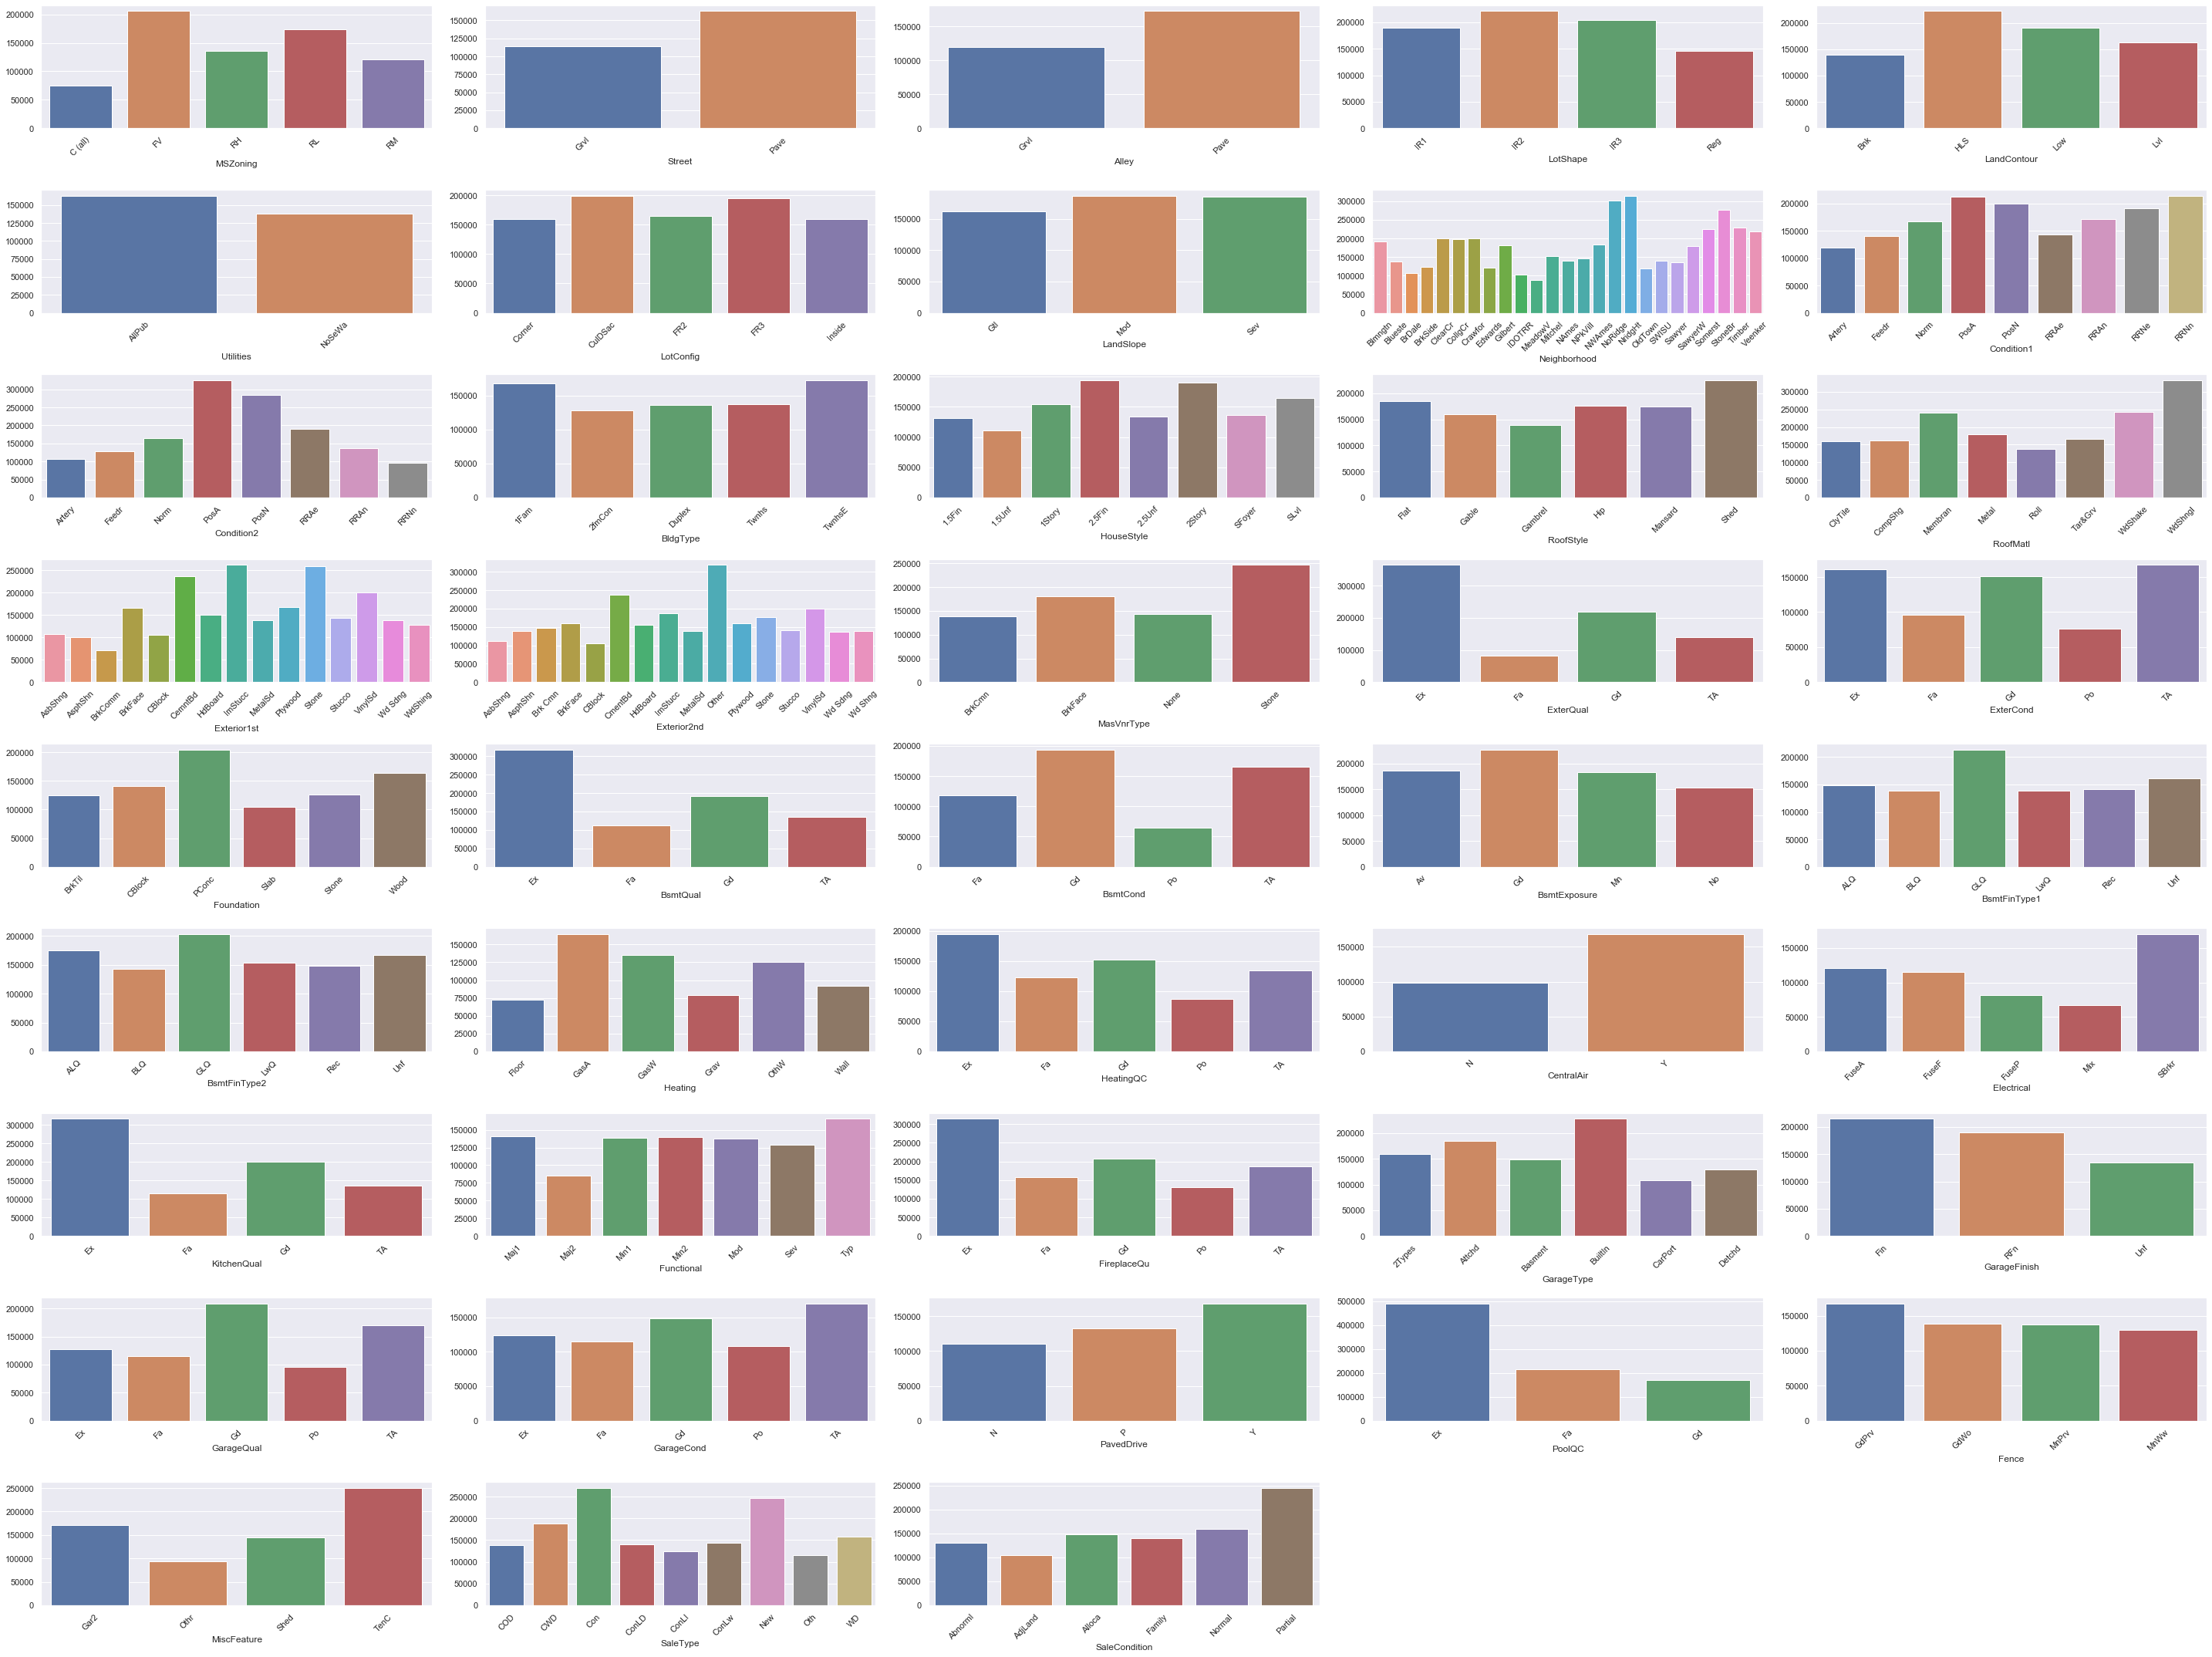

In [55]:
plt.figure(figsize=(40, 30))

for i, feature in enumerate(categorical_features, 1):
    data = train.copy()
    temp = data.groupby(feature)['SalePrice'].median()
    plt.subplot(9, 5, i)
    sns.barplot(temp.index, temp.values)
    plt.xticks(rotation=45)

plt.tight_layout(h_pad=1.2)
plt.show()

**Insights on all categorical features**
* After reading features decription the categorical features, my conclusions are:
1. `MSZoning`: Tells about the zone the house is located in, but we already have a neigborhood variable that'll be more effective.
2. `Street`, `Alley` and `LotConfig` don't seem that important.
3. `LandContour`,  `LotShape`, `LandSlope`: are basically giving the same information, they might be correlated with each other too.
4. `Utilities`: is an important feature as it generally affects the price of a house.
5. `Neigborhood`: Location is important while buying a house though we ended up discarding it in the initial selection as most of the SalePrice values are have overlapping with each other.
6. `Condition1` and `Condition2`: `Condition1` seems a good choice.
7. `BldgType` and `HouseStyle`: Both are important factors for pricing.
8. `RoofStyle`, `RoofMatl`: Does it matter as long is it sturdy?. 
9. `Exterior1st`, `Exterior2nd`: Both seem to have effect on the Sales Price.
10. `MasVnrType`: From above it does seem to be important (feature selection will help in determining this).
11. `ExterQual` and `ExterCond`: `ExterCond` seems a likely choice as the current condition of the externals determines the price more than what it was.
12. `Foundation`: one of the main ingredients in determing house prices.
13. `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`: Earlier during missing value analysis there was consistency in  the rows that matched. These features might be correlated with each other so we can either take just one of two features that represents the `BsmtX` variables and have high correlation with the `SalePrice`. `BsmtQual` and `BsmtExposure` seem optimal choices.
14. `Heating`, `HeatingQC`: `HeatingQC` seems a good choice of the two.
15. `CentralAir`, `Electrical`: Though not many of us would ask the type of electrical system in the house as an initial question but information about the conditioning might play a role in determining the price.
16. `KitchenQual`: an important factor we would all agree on.
17. `FireplaceQu`: It has a lot of missing values as if fireplace is not present, but does affect the pricing of the house if present.
18. `GarageType`, `GarageFinish`, `GarageQual`,  `GarageCond`: as dicussed earlier to represent all these features `GarageCars` might be sufficienct.
19. `PoolQC`, `Fence`: too many missing values.
20. `MiscFeature`: `MiscVal` feature might be all that's necessary.
21. `SaleType` and `SaleCondition`: Personally don't think would affect the Sale price value of the house that much.
22. `PavedDrive`: Surroundings do affect the price of a house.


We have gone through quite a number of differnt numerical, categorical, discrete, continuous and temporal features and have a plan on how to go around the feature engineering process.

In the next kernel we'll see how we can from the concepts learned from this notebook apply it to the feature engineering process and later the end goal of this project: model building 